In [1]:
!pip install wordcloud


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

In [3]:
df = pd.read_csv('Cleaned_Version_2.csv')

In [4]:
df = df.iloc[:,1:]

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
df.head()

,index,model,brand_names,price,rating,SIM_Type,Contains_5G,Has_NFC,Has_IR_Blaster,Processor_name,Processor_Company,Number_of_Cores,Processor_Speed(Num),Processor_speed,RAM,ROM,Battery_Capacity,Fast_Charging_There?,Fast_Charging_in_(Watts),Screen_Size(inches),Resolution,Screen_Rate,Punch_Hole/Drop_Notch,Num_of_rear_cam,Rear Cam (primary_lens),Num_of_front_cam,Front Cam(primary_lens),Memory_Card_Supported_Or_Not,Capacity,OS_Type,OS_Version
0,2,OnePlus 11 5G,oneplus,54999,89.0,Dual Sim,True,True,False,Snapdragon 8 Gen2,Snapdragon,Octa Core,3.2,3.2 GHz Processor,12 GB,256 GB,5000.0,Contains Fast Charging,100.0,6.70,1440 x 3216 px,120,Punch Hole,3,50,1,16,Memory Card Not Supported,NaN,Android,v13
1,3,OnePlus Nord CE 2 Lite 5G,oneplus,19989,81.0,Dual Sim,True,False,False,Snapdragon 695,Snapdragon,Octa Core,2.2,2.2 GHz Processor,6 GB,128 GB,5000.0,Contains Fast Charging,33.0,6.59,1080 x 2412 px,120,Punch Hole,3,64,1,16,Memory Card (Hybrid),1TB,Android,v12
2,4,Samsung Galaxy A14 5G,samsung,16499,75.0,Dual Sim,True,False,False,Exynos 1330,Exynos,Octa Core,2.4,2.4 GHz Processor,4 GB,64 GB,5000.0,Contains Fast Charging,15.0,6.60,1080 x 2408 px,90,Water Drop Notch,3,50,1,13,Memory Card Supported,1TB,Android,v13
3,5,Motorola Moto G62 5G,motorola,14999,81.0,Dual Sim,True,False,False,Snapdragon 695,Snapdragon,Octa Core,2.2,2.2 GHz Processor,6 GB,128 GB,5000.0,Contains Fast Charging,NaN,6.55,1080 x 2400 px,120,Punch Hole,3,50,1,16,Memory Card (Hybrid),1TB,Android,v12
4,6,Realme 10 Pro Plus,realme,24999,82.0,Dual Sim,True,False,False,Dimensity 1080,Dimensity,Octa Core,2.6,2.6 GHz Processor,6 GB,128 GB,5000.0,Contains Fast Charging,67.0,6.70,1080 x 2412 px,120,Punch Hole,3,108,1,16,Memory Card Not Supported,NaN,Android,v13


## Univariate Analysis.

##### Brand Names

Insights : 1. The major Companies (with most products) Listed on the SmartPrix website are namely xiaomi , samsung , vivo , realme , oppo .

In [7]:
fields  = ['brand_names']

In [8]:
text2 = pd.read_csv('Cleaned_Version_2.csv', usecols=fields)

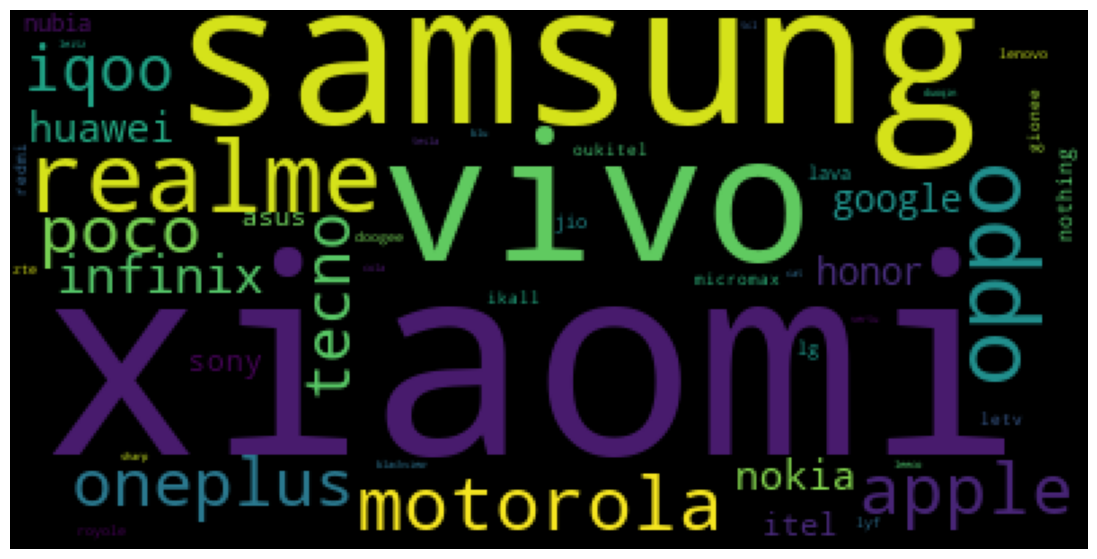

In [9]:
text3 = ' '.join(text2['brand_names'])
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.figure(figsize = (20,7))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [10]:
df['brand_names'].value_counts().nlargest(5)

xiaomi     134
samsung    132
vivo       111
realme      97
oppo        88
Name: brand_names, dtype: int64

In [11]:
temp = df['brand_names'].value_counts().nlargest(5)
temp = temp.reset_index()

In [12]:
temp

,index,brand_names
0,xiaomi,134
1,samsung,132
2,vivo,111
3,realme,97
4,oppo,88


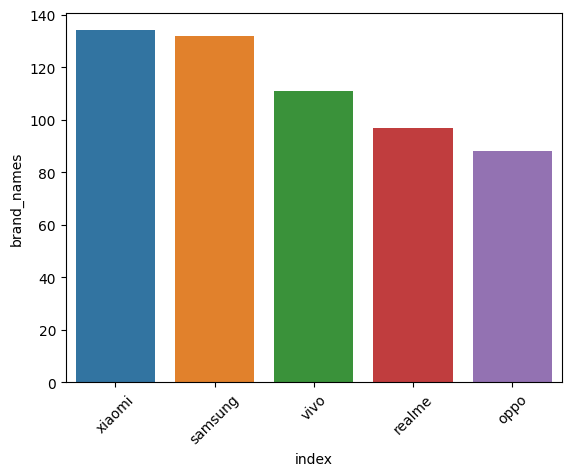

In [13]:
sns.barplot(data = temp ,x = 'index' ,y  = 'brand_names')
plt.xticks(rotation = 45)
plt.show()

<Axes: ylabel='brand_names'>

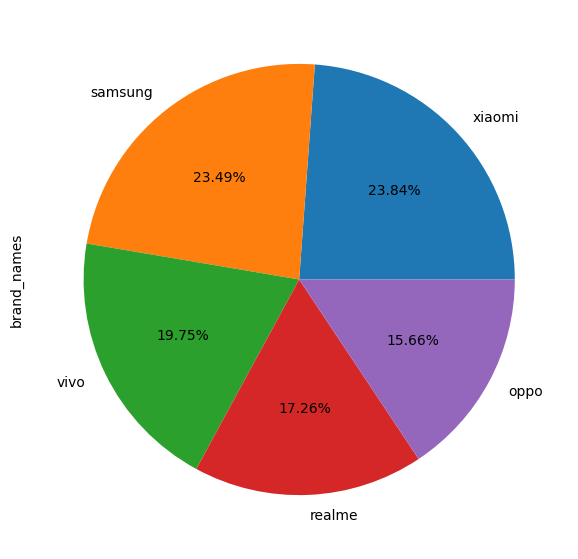

In [14]:
# Lets Calculate the Percentage. 
plt.figure(figsize = (7,7))
df['brand_names'].value_counts().nlargest(5).plot(kind = 'pie',autopct = '%.2f%%')

In [15]:
df['brand_names'].isnull().sum()

0

##### Price

1. The Data is highly skewed.
2. The Data Skewness was due to Some signature phones which were removed high end phones with brand mes(Apple,Samsung) were kept in the data.
3. The Data is not normally distributed. 
4. Data contains a lot of outliers.
5. Most High end Phones belong to the apple and Samsung Companies.

In [16]:
df['price'].describe()

count       985.000000
mean      32388.608122
std       39475.086721
min        3499.000000
25%       12999.000000
50%       19990.000000
75%       35389.000000
max      650000.000000
Name: price, dtype: float64

In [17]:
df['price'].skew()

6.59507711973288

<Axes: xlabel='price', ylabel='Count'>

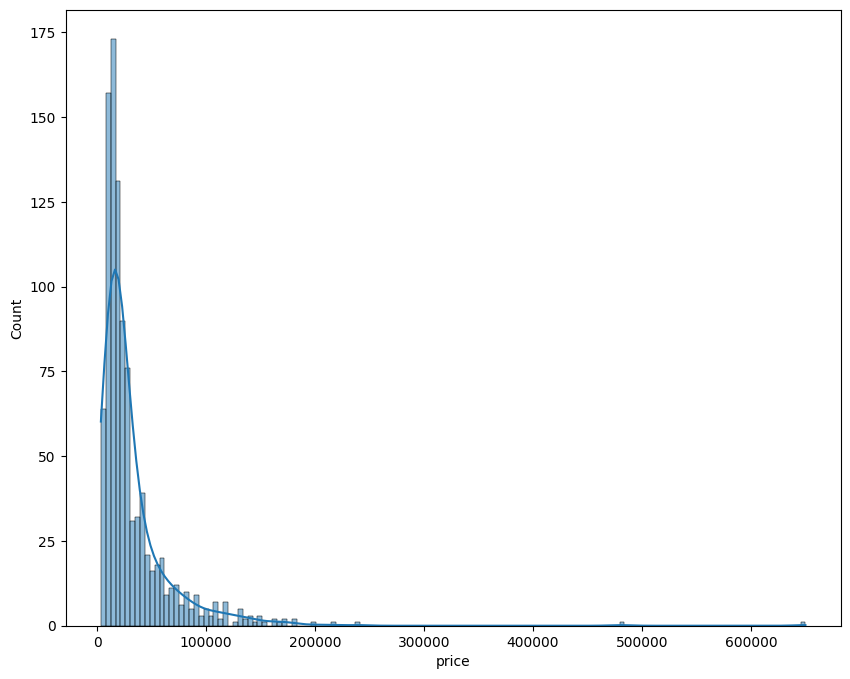

In [18]:
plt.figure(figsize = (10,8))
sns.histplot(data = df , x = 'price',kde = True)

In [19]:
df[df['price'] > 200000].index

Int64Index([428, 479, 891, 956], dtype='int64')

In [20]:
df.drop(index =df[df['price'] > 200000].index ,inplace = True )

<Axes: xlabel='price', ylabel='Count'>

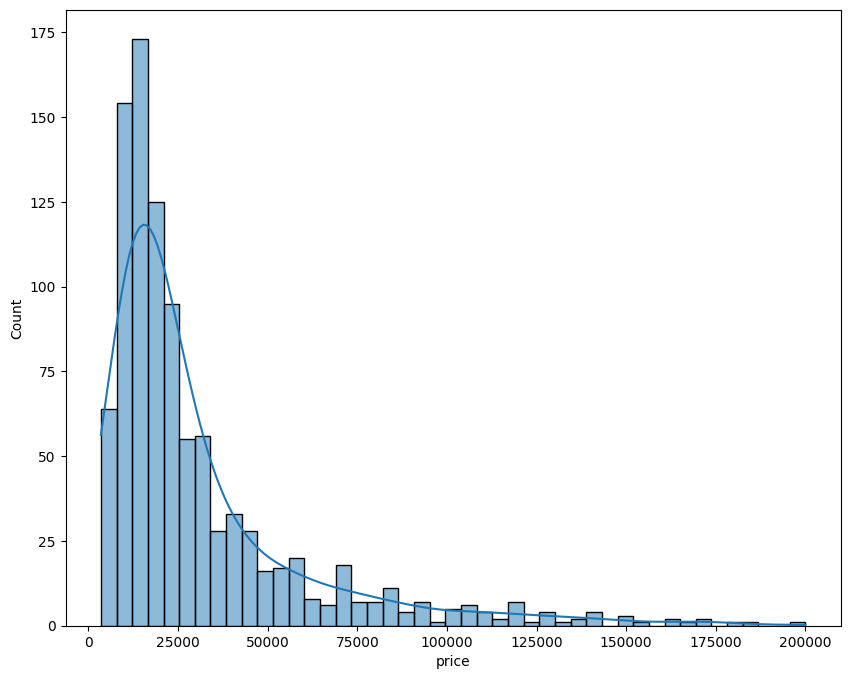

In [21]:
plt.figure(figsize = (10,8))
sns.histplot(data = df , x = 'price',kde = True)

<Axes: ylabel='price'>

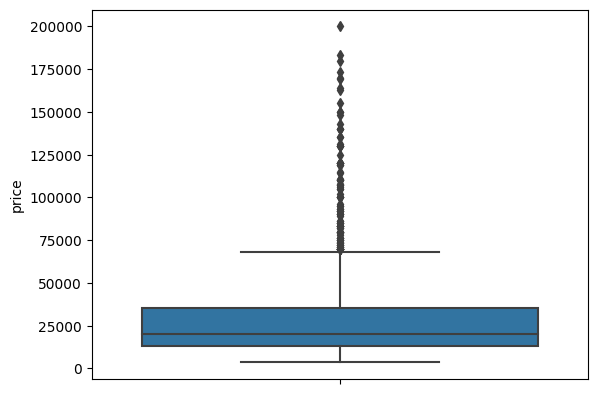

In [22]:
sns.boxplot(data = df , y = 'price')

In [23]:
df[df['price'] > 75000]['brand_names'].value_counts().nlargest(5)

apple      26
samsung    20
oppo        7
vivo        7
xiaomi      4
Name: brand_names, dtype: int64

##### Rating

1. Data is nearly normal.
2. There are no outliers and the data is well balanced 


In [24]:
df['rating'].describe()

count    876.000000
mean      78.262557
std        7.387218
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

In [25]:
df['rating'].skew()

-0.6980929290123329

In [26]:
df['rating'].isnull().sum()

105

<Axes: ylabel='rating'>

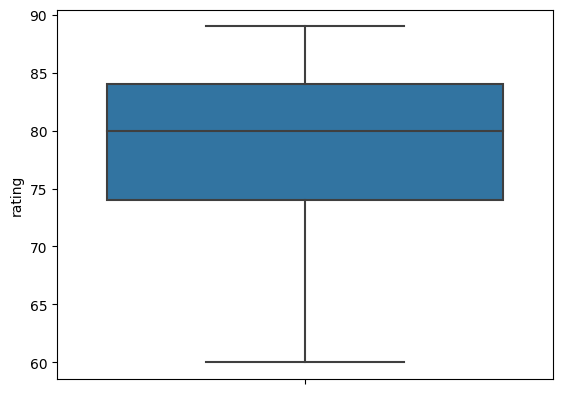

In [27]:
sns.boxplot(data = df , y = 'rating')

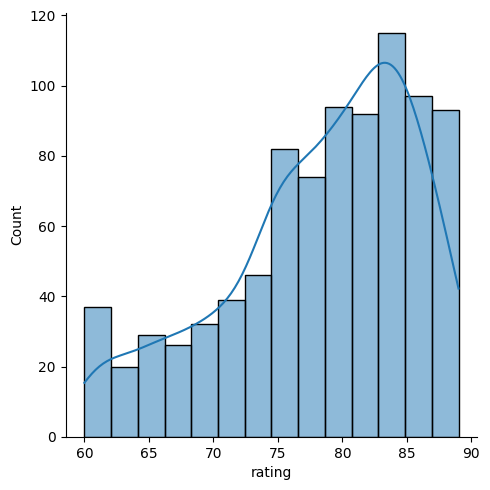

In [28]:
sns.displot(data =df , x  = 'rating' , kde = 'True')

In [29]:
df.head()

,index,model,brand_names,price,rating,SIM_Type,Contains_5G,Has_NFC,Has_IR_Blaster,Processor_name,Processor_Company,Number_of_Cores,Processor_Speed(Num),Processor_speed,RAM,ROM,Battery_Capacity,Fast_Charging_There?,Fast_Charging_in_(Watts),Screen_Size(inches),Resolution,Screen_Rate,Punch_Hole/Drop_Notch,Num_of_rear_cam,Rear Cam (primary_lens),Num_of_front_cam,Front Cam(primary_lens),Memory_Card_Supported_Or_Not,Capacity,OS_Type,OS_Version
0,2,OnePlus 11 5G,oneplus,54999,89.0,Dual Sim,True,True,False,Snapdragon 8 Gen2,Snapdragon,Octa Core,3.2,3.2 GHz Processor,12 GB,256 GB,5000.0,Contains Fast Charging,100.0,6.70,1440 x 3216 px,120,Punch Hole,3,50,1,16,Memory Card Not Supported,NaN,Android,v13
1,3,OnePlus Nord CE 2 Lite 5G,oneplus,19989,81.0,Dual Sim,True,False,False,Snapdragon 695,Snapdragon,Octa Core,2.2,2.2 GHz Processor,6 GB,128 GB,5000.0,Contains Fast Charging,33.0,6.59,1080 x 2412 px,120,Punch Hole,3,64,1,16,Memory Card (Hybrid),1TB,Android,v12
2,4,Samsung Galaxy A14 5G,samsung,16499,75.0,Dual Sim,True,False,False,Exynos 1330,Exynos,Octa Core,2.4,2.4 GHz Processor,4 GB,64 GB,5000.0,Contains Fast Charging,15.0,6.60,1080 x 2408 px,90,Water Drop Notch,3,50,1,13,Memory Card Supported,1TB,Android,v13
3,5,Motorola Moto G62 5G,motorola,14999,81.0,Dual Sim,True,False,False,Snapdragon 695,Snapdragon,Octa Core,2.2,2.2 GHz Processor,6 GB,128 GB,5000.0,Contains Fast Charging,NaN,6.55,1080 x 2400 px,120,Punch Hole,3,50,1,16,Memory Card (Hybrid),1TB,Android,v12
4,6,Realme 10 Pro Plus,realme,24999,82.0,Dual Sim,True,False,False,Dimensity 1080,Dimensity,Octa Core,2.6,2.6 GHz Processor,6 GB,128 GB,5000.0,Contains Fast Charging,67.0,6.70,1080 x 2412 px,120,Punch Hole,3,108,1,16,Memory Card Not Supported,NaN,Android,v13


##### Sim Type

1. Most of the Phones today come with dual sim feature.
2. Not a good feature to train out ML model.

In [30]:
df['SIM_Type'].value_counts()

Dual Sim      965
Single Sim     16
Name: SIM_Type, dtype: int64

In [31]:
df['SIM_Type'].isnull().sum()

0

<Axes: ylabel='SIM_Type'>

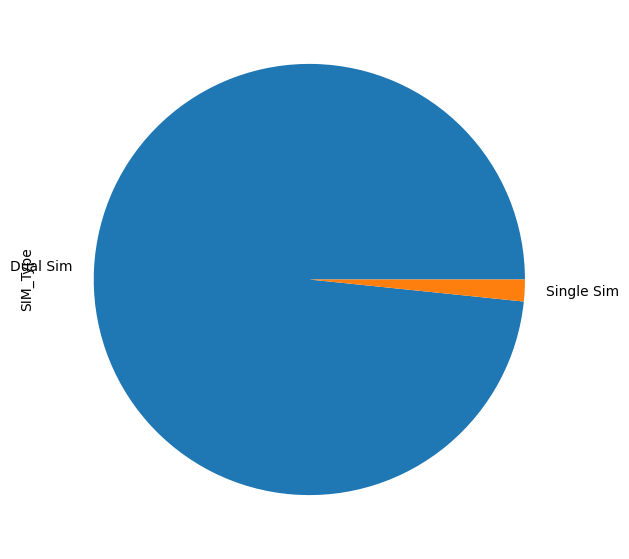

In [32]:
plt.figure(figsize = (7,7))
df['SIM_Type'].value_counts().plot(kind = 'pie')

#### 5G

1. This is a good feauture for training ML model. 

In [33]:
df['Contains_5G'].value_counts()

True     548
False    433
Name: Contains_5G, dtype: int64

<Axes: ylabel='Contains_5G'>

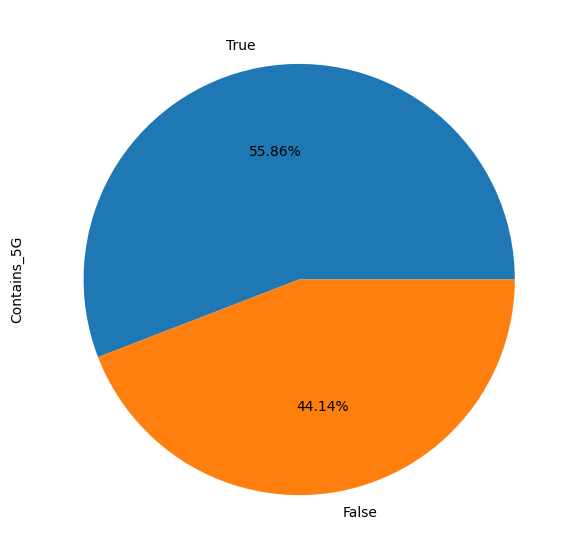

In [34]:
plt.figure(figsize = (7,7))
df['Contains_5G'].value_counts().plot(kind = 'pie',autopct = '%.2f%%')

<Axes: xlabel='Contains_5G', ylabel='count'>

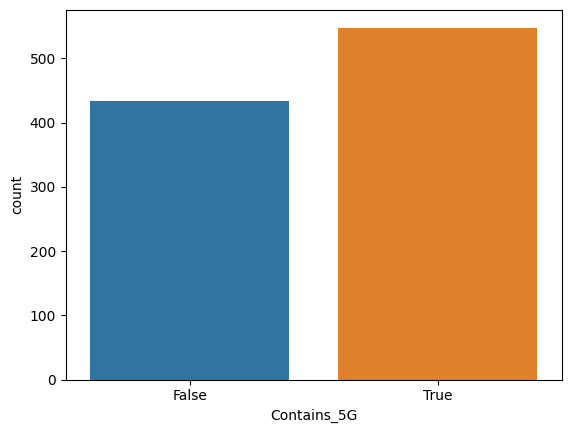

In [35]:
sns.countplot(data = df , x = 'Contains_5G')

##### NFC Availability

1. As NFC facility is only found in branded phones this can be a good feature for ML model.

In [36]:
df['Has_NFC'].value_counts()

False    592
True     389
Name: Has_NFC, dtype: int64

In [37]:
df['Has_NFC'].isnull().sum()

0

<Axes: ylabel='Has_NFC'>

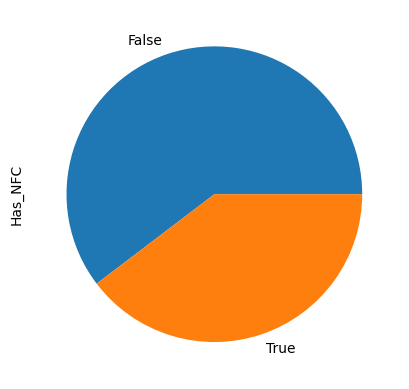

In [38]:
df['Has_NFC'].value_counts().plot(kind = 'pie')

##### Processor Company

In [39]:
df['Processor_Company'].value_counts().index

Index(['Snapdragon', 'Helio', 'Dimensity', 'Exynos', 'Bionic', 'Unisoc',
       'Tiger', 'Google', 'Kirin', 'A13', 'Qualcomm', 'Spreadtrum', 'SC9863A',
       'Mediatek', 'Apple', 'Fusion', 'Sanpdragon', 'Samsung'],
      dtype='object')

In [40]:
df['Processor_Company'].replace(
{
    'Sanpdragon' : 'Snapdragon'
},inplace = True)

In [41]:
df['Processor_Company'].value_counts()

Snapdragon    407
Helio         201
Dimensity     177
Exynos         49
Bionic         39
Unisoc         27
Tiger          24
Google          9
Kirin           6
A13             5
Qualcomm        5
Spreadtrum      4
SC9863A         2
Apple           1
Fusion          1
Mediatek        1
Samsung         1
Name: Processor_Company, dtype: int64

In [42]:
df[df['Processor_Company'] == 'Samsung'].index

Int64Index([843], dtype='int64')

In [43]:
df.loc[df[df['Processor_Company'] == 'Samsung'].index,'Processor_Company'] = 'Exynos'

In [44]:
df.loc[df[df['Processor_Company'] == 'Apple'].index,'Processor_Company'] = 'A13'

In [45]:
df['Processor_Company'].value_counts().nlargest(5)

Snapdragon    407
Helio         201
Dimensity     177
Exynos         50
Bionic         39
Name: Processor_Company, dtype: int64

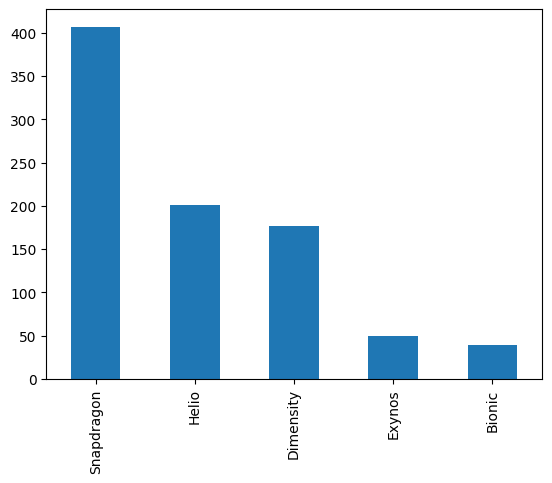

In [46]:
df['Processor_Company'].value_counts().nlargest(5).plot(kind = 'bar')
plt.show()

##### Processor Speed

1. Most of the Processors work at a freq of 2 - 2.50 GHz.

<Axes: xlabel='Processor_Speed(Num)', ylabel='Count'>

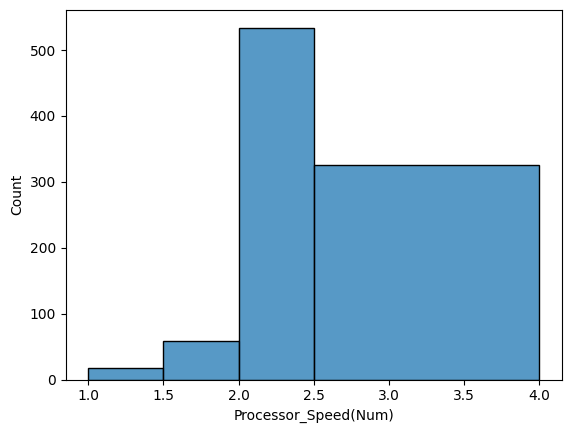

In [47]:
sns.histplot(data = df , x = 'Processor_Speed(Num)' , bins = [1,1.5,2,2.5,4])

In [48]:
df['Processor_Speed(Num)'].value_counts()

2.00    146
2.20    135
2.40    128
3.20     93
2.30     86
3.00     53
2.84     36
2.05     28
2.50     23
1.80     23
1.60     20
2.85     19
3.22     18
3.10     15
2.60     14
2.90     13
1.82     10
1.30     10
2.73      9
2.80      8
3.05      8
2.36      8
2.70      5
1.40      5
2.65      5
2.96      3
1.50      3
1.10      2
3.13      2
2.86      2
2.35      1
2.37      1
1.99      1
1.95      1
2.10      1
1.20      1
Name: Processor_Speed(Num), dtype: int64

##### Number of Cores.

In [49]:
df['Number_of_Cores'].value_counts()

Octa Core    895
Hexa Core     39
Quad Core     37
Dual Core      1
Name: Number_of_Cores, dtype: int64

<Axes: ylabel='Number_of_Cores'>

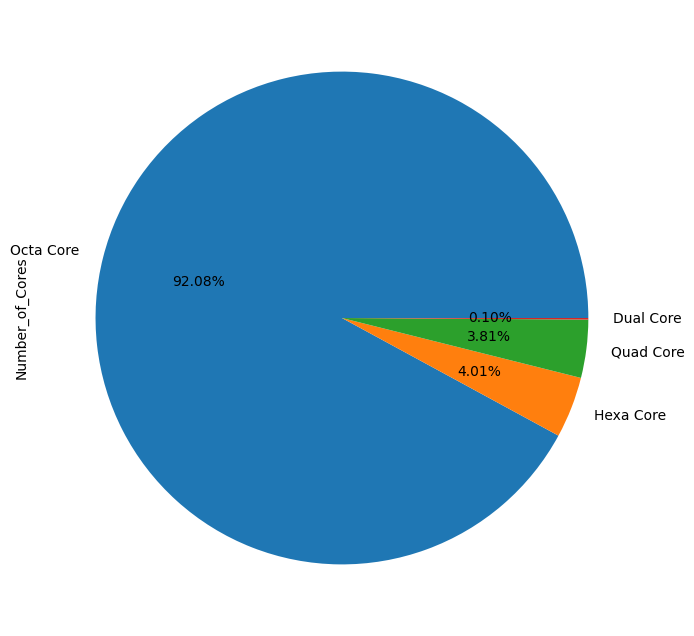

In [50]:
plt.figure(figsize = (8,8))
df['Number_of_Cores'].value_counts().plot(kind = 'pie',autopct=  '%.2f%%')

##### RAM

1. Most of the Phones now comes with a 8 GB Ram
2. Has 3 Null values.

In [51]:
df['RAM'].value_counts()

8 GB      338
6 GB      234
4 GB      215
12 GB      84
3 GB       54
2 GB       31
16 GB       9
1 GB        8
512 MB      2
18 GB       2
64 MB       1
256 MB      1
Name: RAM, dtype: int64

In [52]:
t  = df.groupby('RAM').size().reset_index()

In [53]:
t.columns = ['RAM','COUNT']

In [54]:
t

,RAM,COUNT
0,1 GB,8
1,12 GB,84
2,16 GB,9
3,18 GB,2
4,2 GB,31
5,256 MB,1
6,3 GB,54
7,4 GB,215
8,512 MB,2
9,6 GB,234


In [55]:
t[t['COUNT'] > 50]['RAM'].values

array(['12 GB', '3 GB', '4 GB', '6 GB', '8 GB'], dtype=object)

<Axes: ylabel='RAM'>

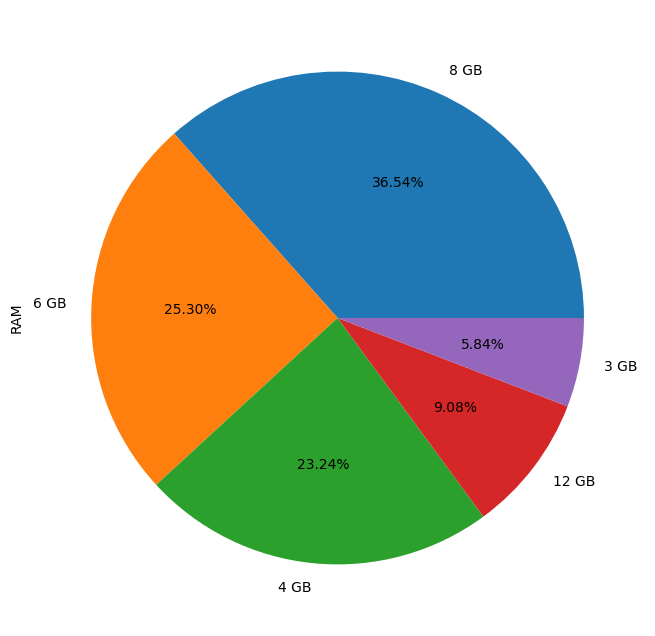

In [56]:
plt.figure(figsize = (8,8))
df[df['RAM'].isin(t[t['COUNT'] > 50]['RAM'].values)]['RAM'].value_counts().plot(kind = 'pie',autopct = '%.2f%%')

In [57]:
t  = df[df['RAM'].isin(t[t['COUNT'] > 50]['RAM'].values)]['RAM'].value_counts()

In [58]:
t = t.reset_index()
t

,index,RAM
0,8 GB,338
1,6 GB,234
2,4 GB,215
3,12 GB,84
4,3 GB,54


<Axes: xlabel='index', ylabel='RAM'>

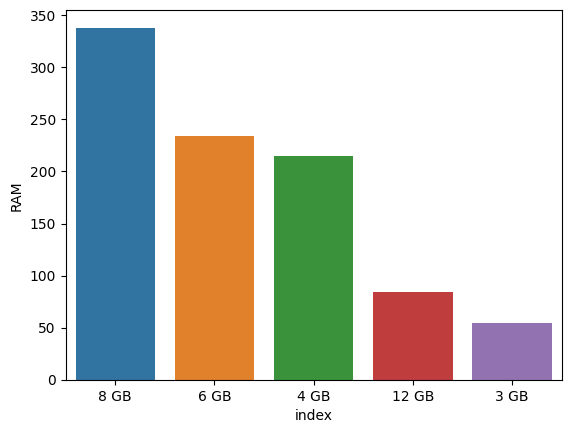

In [59]:
sns.barplot(data = t ,x = 'index',y='RAM')

In [60]:
df['RAM'].isnull().sum()

2

In [61]:
df[df['RAM'].isnull()]

,index,model,brand_names,price,rating,SIM_Type,Contains_5G,Has_NFC,Has_IR_Blaster,Processor_name,Processor_Company,Number_of_Cores,Processor_Speed(Num),Processor_speed,RAM,ROM,Battery_Capacity,Fast_Charging_There?,Fast_Charging_in_(Watts),Screen_Size(inches),Resolution,Screen_Rate,Punch_Hole/Drop_Notch,Num_of_rear_cam,Rear Cam (primary_lens),Num_of_front_cam,Front Cam(primary_lens),Memory_Card_Supported_Or_Not,Capacity,OS_Type,OS_Version
436,441,Apple iPhone SE 3 2022,apple,43900,NaN,Dual Sim,True,True,False,Bionic A15,Bionic,Hexa Core,3.22,3.22 GHz Processor,NaN,64 GB,2018.0,Contains Fast Charging,20.0,4.7,750 x 1334 px,60,NaN,1,12,1,7,Memory Card Not Supported,NaN,iOS,v15
740,764,Apple iPhone SE 4,apple,49990,60.0,Dual Sim,True,True,False,Bionic A15,Bionic,Hexa Core,3.22,3.22 GHz Processor,NaN,64 GB,1642.0,Contains Fast Charging,20.0,6.1,750 x 1580 px,60,NaN,1,12,1,10.8,Memory Card Not Supported,NaN,iOS,v16


##### ROM

In [62]:
df['ROM'].value_counts().nlargest(5)

128 GB    523
64 GB     192
256 GB    156
32 GB      67
512 GB     20
Name: ROM, dtype: int64

<Axes: ylabel='ROM'>

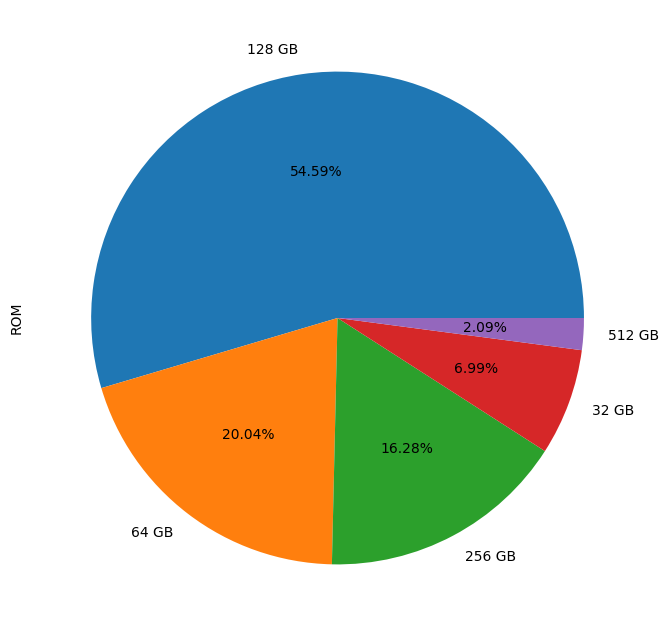

In [63]:
plt.figure(figsize = (8,8))
df['ROM'].value_counts().nlargest(5).plot(kind = 'pie',autopct = '%.2f%%')

In [64]:
df['ROM'].isnull().sum()

0

##### Battery

1. Has a lot of outliers.
2. Apple provides very low battery capacity as compared to other devices.
3. According to the data mostly the list of Phones that are offering a lower battery life as compared to other phones includes Phones which are mostly above the  median price range.


In [65]:
df['Battery_Capacity'].describe()

count      981.000000
mean      4780.153925
std       1056.242577
min       1150.000000
25%       4500.000000
50%       5000.000000
75%       5000.000000
max      22000.000000
Name: Battery_Capacity, dtype: float64

In [66]:
df[df['Battery_Capacity'] == 22000.000000]

,index,model,brand_names,price,rating,SIM_Type,Contains_5G,Has_NFC,Has_IR_Blaster,Processor_name,Processor_Company,Number_of_Cores,Processor_Speed(Num),Processor_speed,RAM,ROM,Battery_Capacity,Fast_Charging_There?,Fast_Charging_in_(Watts),Screen_Size(inches),Resolution,Screen_Rate,Punch_Hole/Drop_Notch,Num_of_rear_cam,Rear Cam (primary_lens),Num_of_front_cam,Front Cam(primary_lens),Memory_Card_Supported_Or_Not,Capacity,OS_Type,OS_Version
847,876,Doogee V Max,doogee,45999,88.0,Dual Sim,True,False,False,Dimensity 1080,Dimensity,Octa Core,2.6,2.6 GHz Processor,12 GB,256 GB,22000.0,Contains Fast Charging,33.0,6.58,1080 x 2408 px,120,Water Drop Notch,3,108,1,32,Memory Card (Hybrid),2TB,Android,v12


<Axes: xlabel='Battery_Capacity'>

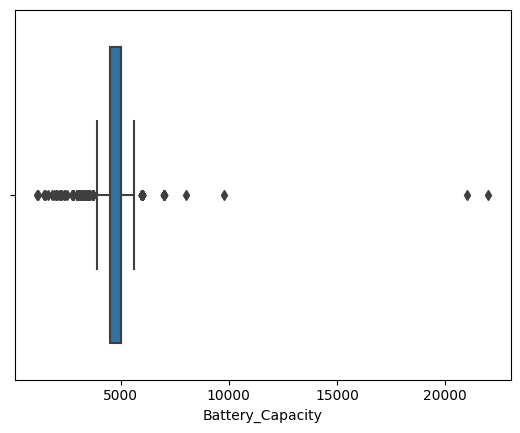

In [67]:
sns.boxplot(data = df , x = 'Battery_Capacity')

In [68]:
df['Battery_Capacity'].isnull().sum()

0

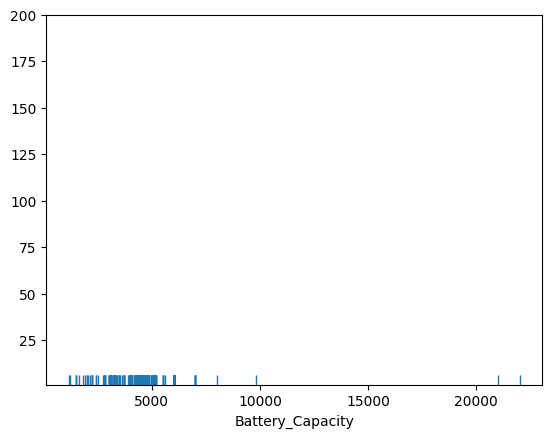

In [69]:
ax = sns.rugplot(data = df , x  = 'Battery_Capacity')
ax.set_ylim([1,200])
plt.show()

In [70]:
t = df[df['Battery_Capacity']>10000]

In [71]:
df.drop(index = t.index,inplace = True)

<Axes: xlabel='Battery_Capacity', ylabel='price'>

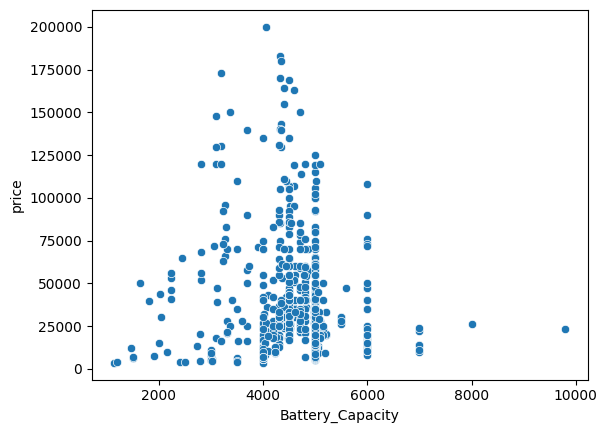

In [72]:
sns.scatterplot(data = df , x = 'Battery_Capacity' , y = 'price')

In [73]:
# lets calculate the IQR for the Battery Capacity.
# IQR = Q3 - Q1
# outliers detection formula boundary values are :  Q1 - 1.5*(IQR) and Q3 + 1.5*(IQR)

In [74]:
low_lim = 4500 - ((5000 - 4500)*1.5)
Upper_lim = 5000 + ((5000 - 4500)*1.5)

In [75]:
low_lim,Upper_lim

(3750.0, 5750.0)

In [76]:
df[(df['Battery_Capacity'] > 5750.0) | (df['Battery_Capacity'] < 3750.0)]

,index,model,brand_names,price,rating,SIM_Type,Contains_5G,Has_NFC,Has_IR_Blaster,Processor_name,Processor_Company,Number_of_Cores,Processor_Speed(Num),Processor_speed,RAM,ROM,Battery_Capacity,Fast_Charging_There?,Fast_Charging_in_(Watts),Screen_Size(inches),Resolution,Screen_Rate,Punch_Hole/Drop_Notch,Num_of_rear_cam,Rear Cam (primary_lens),Num_of_front_cam,Front Cam(primary_lens),Memory_Card_Supported_Or_Not,Capacity,OS_Type,OS_Version
6,8,Apple iPhone 14,apple,65999,81.0,Dual Sim,True,True,False,Bionic A15,Bionic,Hexa Core,3.22,3.22 GHz Processor,6 GB,128 GB,3279.0,Contains Fast Charging,NaN,6.10,1170 x 2532 px,60,NaN,2,12,1,12,Memory Card Not Supported,NaN,iOS,v16
15,17,Apple iPhone 13,apple,62999,79.0,Dual Sim,True,True,False,Bionic A15,Bionic,Hexa Core,3.22,3.22 GHz Processor,4 GB,128 GB,3240.0,Contains Fast Charging,NaN,6.10,1170 x 2532 px,60,NaN,2,12,1,12,Memory Card Not Supported,NaN,iOS,v15
33,35,Apple iPhone 11,apple,38999,73.0,Dual Sim,False,True,False,A13 Bionic,A13,Hexa Core,2.65,2.65 GHz Processor,4 GB,64 GB,3110.0,NaN,NaN,6.10,828 x 1792 px,60,NaN,2,12,1,12,Memory Card Not Supported,NaN,iOS,v13
45,47,Samsung Galaxy M33 5G,samsung,17478,81.0,Dual Sim,True,True,False,Exynos 1280,Exynos,Octa Core,2.40,2.4 GHz Processor,6 GB,128 GB,6000.0,Contains Fast Charging,25.0,6.60,1080 x 2400 px,120,Water Drop Notch,4,50,1,8,Memory Card Supported,1TB,Android,v12
75,77,Gionee G13 Pro,gionee,6190,NaN,Dual Sim,False,False,False,Tiger T310,Tiger,Quad Core,2.00,2 GHz Processor,4 GB,32 GB,3500.0,NaN,NaN,6.26,720 x 1600 px,60,NaN,2,13,1,5,Memory Card Supported,NaN,Others,v2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,997,Samsung Galaxy A7 (2018),samsung,21490,70.0,Dual Sim,False,False,False,Exynos 7885,Exynos,Octa Core,2.20,2.2 GHz Processor,4 GB,64 GB,3300.0,NaN,NaN,6.00,2220 x 1080 px,60,NaN,3,24,1,24,Memory Card Supported,512GB,Android,v8.0
962,998,Vivo Y55S,vivo,13490,NaN,Dual Sim,False,False,False,Snapdragon 425,Snapdragon,Quad Core,1.20,1.2 GHz Processor,3 GB,16 GB,2730.0,NaN,NaN,5.20,720 x 1280 px,60,NaN,1,13,1,5,Memory Card Supported,NaN,Android,v6.0
967,1004,Doogee S99,doogee,14999,84.0,Dual Sim,False,True,False,Helio G96,Helio,Octa Core,2.05,2.05 GHz Processor,8 GB,128 GB,6000.0,Contains Fast Charging,33.0,6.30,1080 x 2340 px,60,NaN,3,108,1,32,Memory Card Supported,1TB,Android,v12
971,1008,Oukitel WP9,oukitel,25899,72.0,Dual Sim,False,True,False,Helio P60,Helio,Octa Core,2.00,2 GHz Processor,6 GB,128 GB,8000.0,NaN,NaN,5.86,720 x 1520 px,60,NaN,3,16,1,8,Memory Card Supported,NaN,Android,v10


In [77]:
df[(df['Battery_Capacity'] < 3750.0)]['brand_names'].value_counts().nlargest(5)

apple      32
samsung     9
nokia       5
vivo        5
google      3
Name: brand_names, dtype: int64

In [78]:
df.head()

,index,model,brand_names,price,rating,SIM_Type,Contains_5G,Has_NFC,Has_IR_Blaster,Processor_name,Processor_Company,Number_of_Cores,Processor_Speed(Num),Processor_speed,RAM,ROM,Battery_Capacity,Fast_Charging_There?,Fast_Charging_in_(Watts),Screen_Size(inches),Resolution,Screen_Rate,Punch_Hole/Drop_Notch,Num_of_rear_cam,Rear Cam (primary_lens),Num_of_front_cam,Front Cam(primary_lens),Memory_Card_Supported_Or_Not,Capacity,OS_Type,OS_Version
0,2,OnePlus 11 5G,oneplus,54999,89.0,Dual Sim,True,True,False,Snapdragon 8 Gen2,Snapdragon,Octa Core,3.2,3.2 GHz Processor,12 GB,256 GB,5000.0,Contains Fast Charging,100.0,6.70,1440 x 3216 px,120,Punch Hole,3,50,1,16,Memory Card Not Supported,NaN,Android,v13
1,3,OnePlus Nord CE 2 Lite 5G,oneplus,19989,81.0,Dual Sim,True,False,False,Snapdragon 695,Snapdragon,Octa Core,2.2,2.2 GHz Processor,6 GB,128 GB,5000.0,Contains Fast Charging,33.0,6.59,1080 x 2412 px,120,Punch Hole,3,64,1,16,Memory Card (Hybrid),1TB,Android,v12
2,4,Samsung Galaxy A14 5G,samsung,16499,75.0,Dual Sim,True,False,False,Exynos 1330,Exynos,Octa Core,2.4,2.4 GHz Processor,4 GB,64 GB,5000.0,Contains Fast Charging,15.0,6.60,1080 x 2408 px,90,Water Drop Notch,3,50,1,13,Memory Card Supported,1TB,Android,v13
3,5,Motorola Moto G62 5G,motorola,14999,81.0,Dual Sim,True,False,False,Snapdragon 695,Snapdragon,Octa Core,2.2,2.2 GHz Processor,6 GB,128 GB,5000.0,Contains Fast Charging,NaN,6.55,1080 x 2400 px,120,Punch Hole,3,50,1,16,Memory Card (Hybrid),1TB,Android,v12
4,6,Realme 10 Pro Plus,realme,24999,82.0,Dual Sim,True,False,False,Dimensity 1080,Dimensity,Octa Core,2.6,2.6 GHz Processor,6 GB,128 GB,5000.0,Contains Fast Charging,67.0,6.70,1080 x 2412 px,120,Punch Hole,3,108,1,16,Memory Card Not Supported,NaN,Android,v13


##### Fast Charging

1. Most of the Phones come today with a Fast Charging Capability. - Can be Used as a Feature

In [79]:
df['Fast_Charging_There?'].value_counts()

Contains Fast Charging    843
Name: Fast_Charging_There?, dtype: int64

In [80]:
df['Fast_Charging_There?'] = df['Fast_Charging_There?'].fillna('Fast Charging Not Available')

<Axes: ylabel='Fast_Charging_There?'>

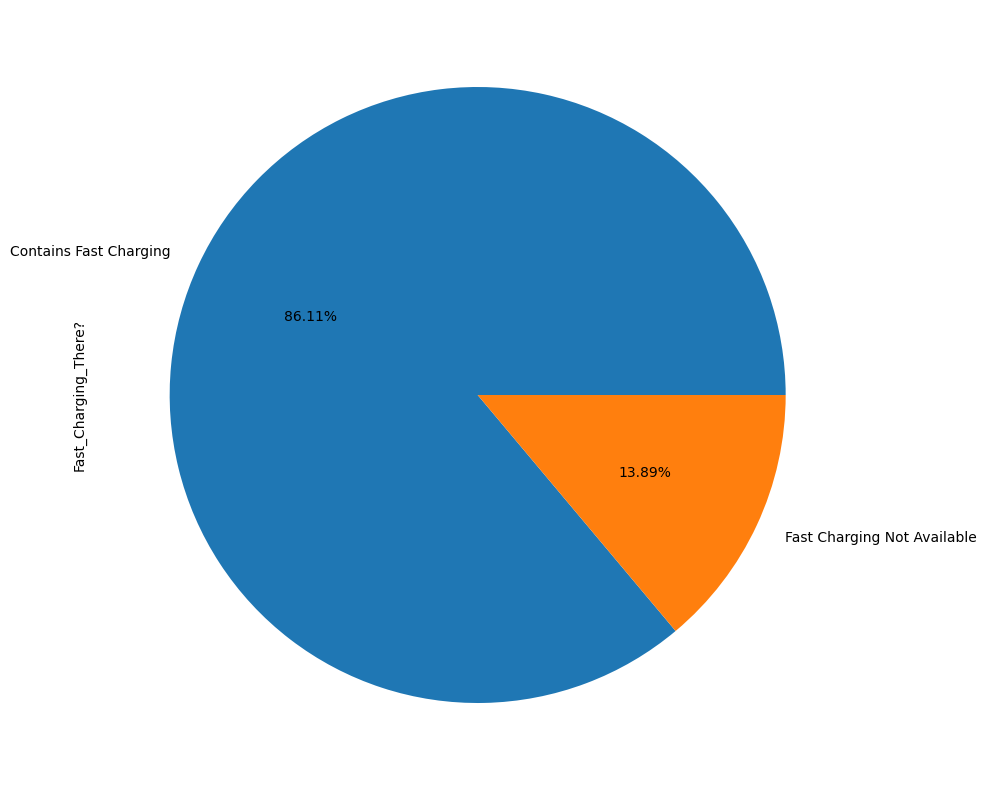

In [81]:
plt.figure(figsize = (10,10))
df['Fast_Charging_There?'].value_counts().plot(kind = 'pie',autopct = '%.2f%%')

##### Screen Rate

1. The most Frequently used Refresh Rates are the 60,90,120 , but there has been an inclusion of new refresh rates such as the 165Hz , 144Hz , 240Hz which are mostly used for the high end purposes i.e  mainly the gaming purposes . The gradual growth in the popularity of the Esports Indstry might be the cause for the development of such high refresh rates.

2. As High refresh rates are only find in high end devices this can be used as a feature in our ML model.

In [82]:
df['Screen_Rate'].unique()

array([120,  90,  60, 144, 165, 240], dtype=int64)

In [83]:
df['Screen_Rate'].value_counts()

60     369
120    342
90     219
144     39
165      9
240      1
Name: Screen_Rate, dtype: int64

<Axes: ylabel='Screen_Rate'>

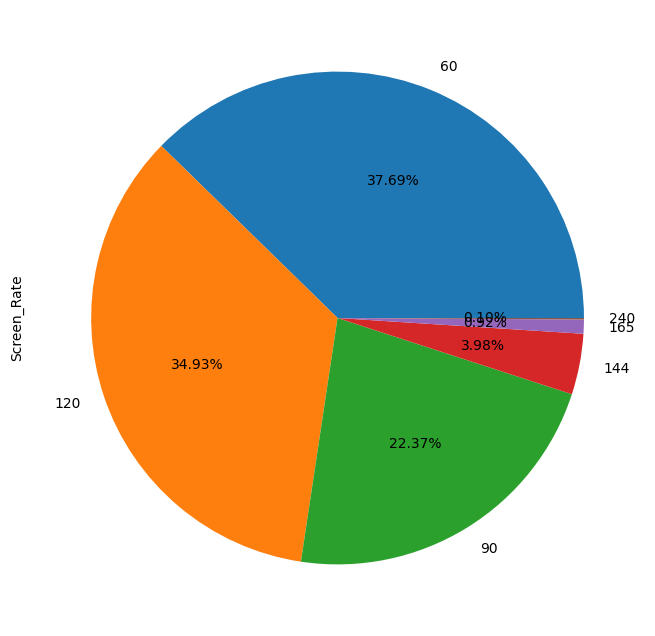

In [84]:
plt.figure(figsize=(8,8))
df['Screen_Rate'].value_counts().plot(kind = 'pie',autopct = '%.2f%%')

##### Number of Rear Camera

1. Most of the phones in the market come with a triple camera set up.
2. It might also be used as a valuable feature in our ML model.

In [85]:
df['Num_of_rear_cam'].value_counts()

3    548
2    207
4    155
1     68
5      1
Name: Num_of_rear_cam, dtype: int64

In [86]:
df.loc[df[df['Num_of_rear_cam'] == 5].index , 'Num_of_rear_cam'] = 4

In [87]:
df['Num_of_rear_cam'].isnull().sum()

0

<Axes: xlabel='Num_of_rear_cam', ylabel='count'>

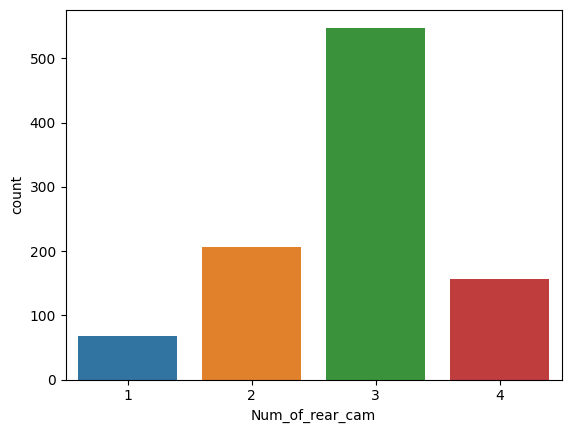

In [88]:
sns.countplot(data = df ,  x = 'Num_of_rear_cam')

##### Operating System.

In [89]:
df['OS_Type'].value_counts()

Android    892
iOS         46
Others      11
Name: OS_Type, dtype: int64

In [90]:
df['OS_Version'].value_counts()

v12        386
v11        271
v13         95
v10         68
v9.0        28
v10.0       23
v16         15
v15         12
v8.1        10
v14          6
v11.0        4
v2.0         4
v8.0         4
v15.0        3
v12.1        2
v6.0         2
v14.0        2
v5.1.1       2
OS           2
(Series      1
v7.1         1
v17          1
v5.1         1
v2           1
v12.3        1
v13.0        1
v9           1
Name: OS_Version, dtype: int64

In [91]:
df.columns

Index(['index', 'model', 'brand_names', 'price', 'rating', 'SIM_Type',
       'Contains_5G', 'Has_NFC', 'Has_IR_Blaster', 'Processor_name',
       'Processor_Company', 'Number_of_Cores', 'Processor_Speed(Num)',
       'Processor_speed', 'RAM', 'ROM', 'Battery_Capacity',
       'Fast_Charging_There?', 'Fast_Charging_in_(Watts)',
       'Screen_Size(inches)', 'Resolution', 'Screen_Rate',
       'Punch_Hole/Drop_Notch', 'Num_of_rear_cam', 'Rear Cam (primary_lens)',
       'Num_of_front_cam', 'Front Cam(primary_lens)',
       'Memory_Card_Supported_Or_Not', 'Capacity', 'OS_Type', 'OS_Version'],
      dtype='object')

## Note : This ends our Univariate Analysis

### Some of the most Important Columns From training a ML model Point of View are : 

1. Brand Name 
2. Rating 
3. Contains_5G
4. Has_NFC 
5. Processor_Name 
6. Processor_Company 
7. RAM and ROM (Together) 
8. Screen_Rate 
9. Rear Camera Primary Lens 
10. Front Camera Primary Lens 
11. Memory Card Support 
12. OS Type and OS version


Note : The output of the ML model would be to predict the Price so the dependency of the price column has to be checked with the above mentioned columns or combination of the above mentioned columns

# Bivariate Analysis

In [92]:
df.head(2)

,index,model,brand_names,price,rating,SIM_Type,Contains_5G,Has_NFC,Has_IR_Blaster,Processor_name,Processor_Company,Number_of_Cores,Processor_Speed(Num),Processor_speed,RAM,ROM,Battery_Capacity,Fast_Charging_There?,Fast_Charging_in_(Watts),Screen_Size(inches),Resolution,Screen_Rate,Punch_Hole/Drop_Notch,Num_of_rear_cam,Rear Cam (primary_lens),Num_of_front_cam,Front Cam(primary_lens),Memory_Card_Supported_Or_Not,Capacity,OS_Type,OS_Version
0,2,OnePlus 11 5G,oneplus,54999,89.0,Dual Sim,True,True,False,Snapdragon 8 Gen2,Snapdragon,Octa Core,3.2,3.2 GHz Processor,12 GB,256 GB,5000.0,Contains Fast Charging,100.0,6.70,1440 x 3216 px,120,Punch Hole,3,50,1,16,Memory Card Not Supported,NaN,Android,v13
1,3,OnePlus Nord CE 2 Lite 5G,oneplus,19989,81.0,Dual Sim,True,False,False,Snapdragon 695,Snapdragon,Octa Core,2.2,2.2 GHz Processor,6 GB,128 GB,5000.0,Contains Fast Charging,33.0,6.59,1080 x 2412 px,120,Punch Hole,3,64,1,16,Memory Card (Hybrid),1TB,Android,v12


### Price Vs Brand 

1. There is a clear dependency of Price on Brand column.

In [93]:
# lets plot the graph of only those brands of phones which have more than 30 listed phones on SmartPrix Website.

In [94]:
t =  df.groupby('brand_names').size().reset_index()

In [95]:
t.columns = ['Brands','Count']

In [96]:
t.head()

,Brands,Count
0,apple,46
1,asus,7
2,blackview,1
3,blu,1
4,cat,1


In [97]:
t = t[t['Count'] > 10]

In [98]:
t

,Brands,Count
0,apple,46
9,google,14
10,honor,13
11,huawei,14
13,infinix,29
14,iqoo,32
25,motorola,52
26,nokia,17
29,oneplus,42
30,oppo,88


In [99]:
df2  = df[df['brand_names'].isin(t['Brands'].to_list())]

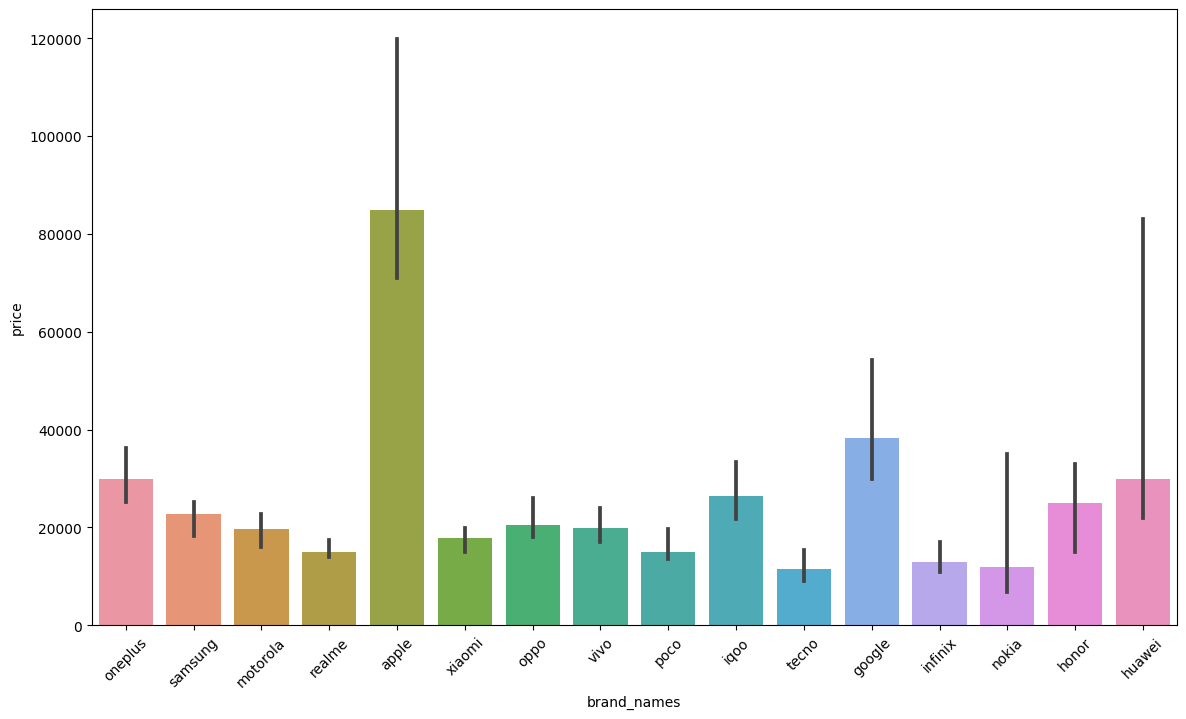

In [100]:
plt.figure(figsize = (14,8))
sns.barplot(data = df2 ,  x = 'brand_names', y = 'price',estimator=np.median)
plt.xticks(rotation = 45)
plt.show()

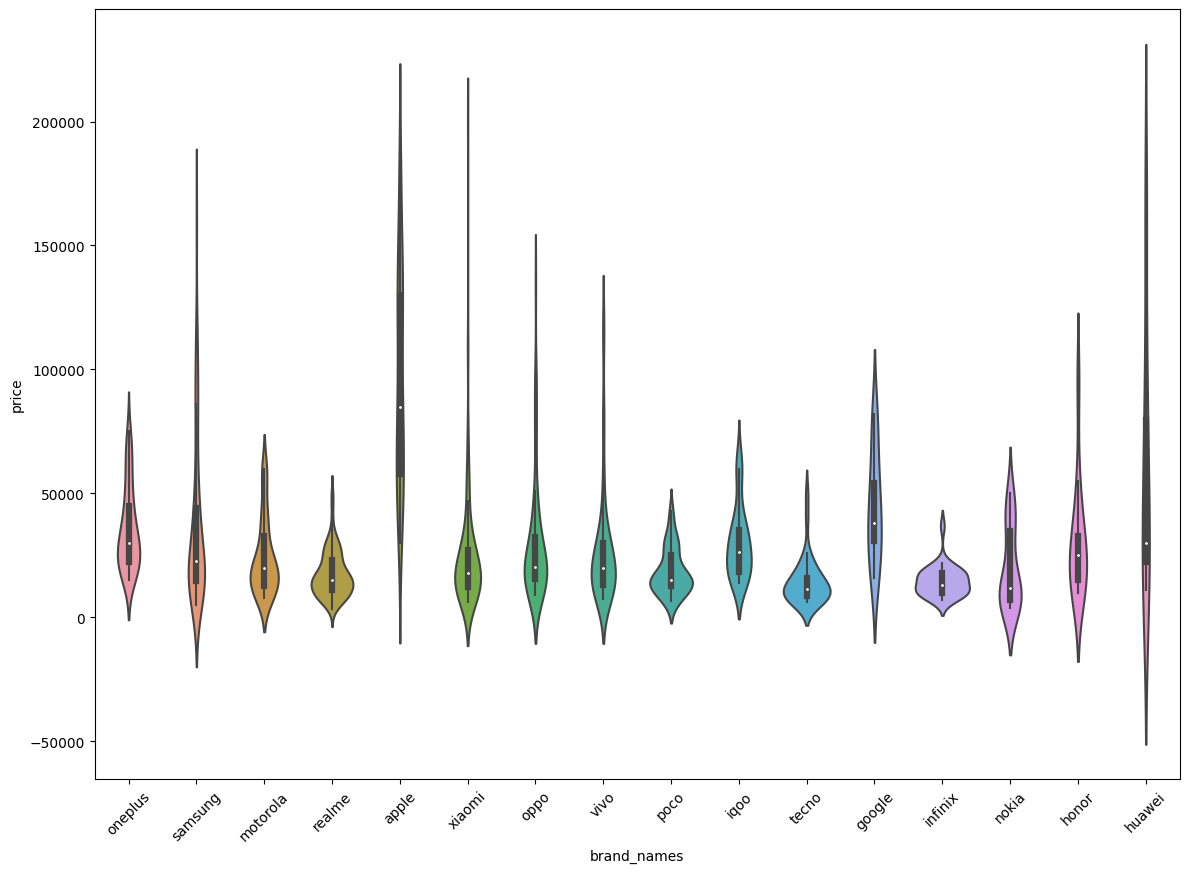

In [101]:
plt.figure(figsize = (14,10))
ax = sns.violinplot(data = df2 , x = 'brand_names' , y = 'price')
plt.xticks(rotation = 45)
plt.show()

### Price Vs Rating

1. Here we can clearly see that as rating increases there is a very minute gradual change in the price of the Mobile Phones . But There are Phones which have very good rating and they also have decent price w.r.t the specs provided and the overall rating. 
2. So Rating does matter in a way for deciding the Price but not so much.
3. There are a lot of Phones in the Range of 75 to 80 (in terms of Ratings) and they have  their price near to 25000 , These may be the Phones which get bought most frequently.

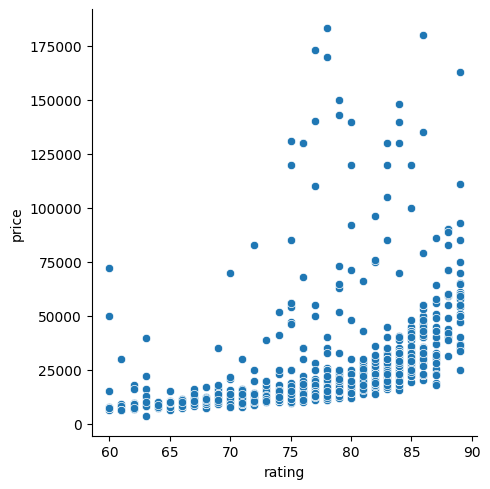

In [102]:
sns.relplot(data = df2 , x = 'rating' , y = 'price')

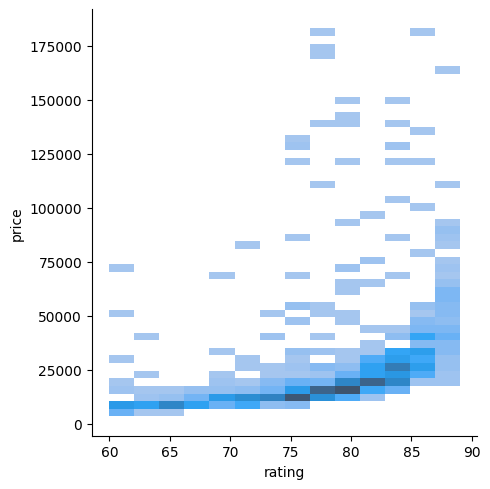

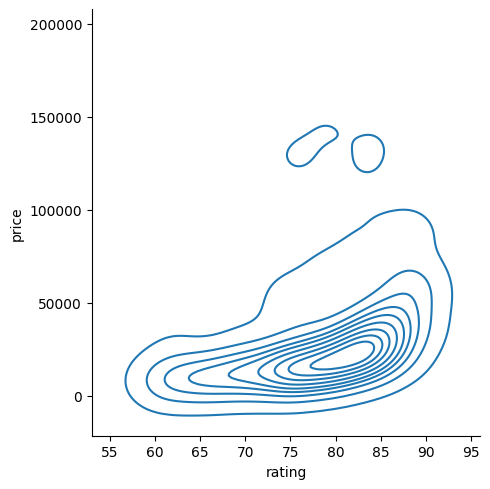

In [103]:
sns.displot(data = df2 , x = 'rating' , y = 'price', kind = 'hist')
sns.displot(data = df2 , x = 'rating' , y = 'price' ,kind = 'kde')

<Axes: xlabel='SIM_Type', ylabel='price'>

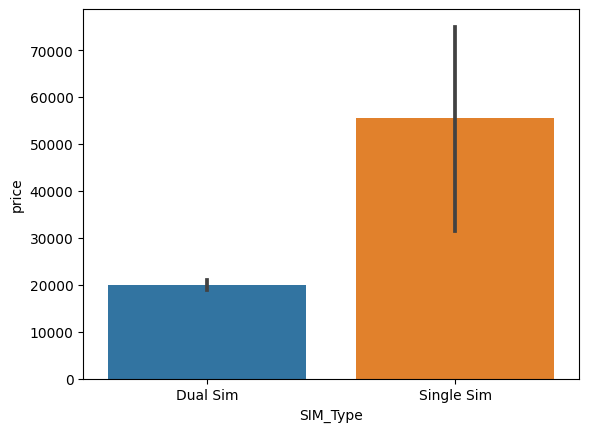

In [104]:
sns.barplot(data = df2 , x = 'SIM_Type' , y = 'price',estimator = np.median)

### 5G Availability

1. Phones that have the feature of 5G availability they have a higher Price.

<Axes: xlabel='Contains_5G', ylabel='price'>

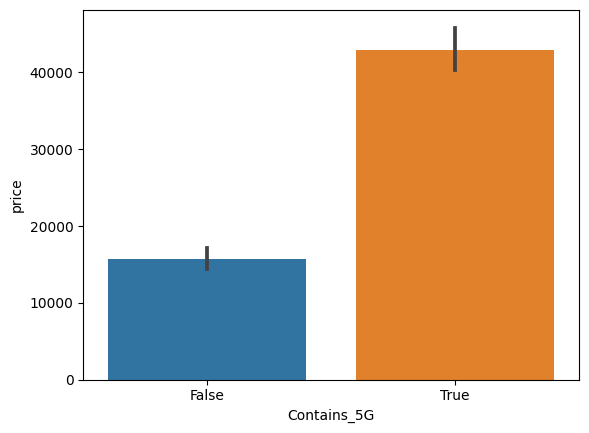

In [105]:
sns.barplot(data =df , x = 'Contains_5G' , y='price')

In [106]:
df.corr()

C:\Users\91700\AppData\Local\Temp\ipykernel_29644\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,index,price,rating,Contains_5G,Has_NFC,Has_IR_Blaster,Processor_Speed(Num),Battery_Capacity,Fast_Charging_in_(Watts),Screen_Size(inches),Screen_Rate,Num_of_rear_cam,Num_of_front_cam
index,1.000000,-0.001620,-0.174663,-0.220240,-0.066170,-0.038573,-0.113518,-0.064620,-0.050928,-0.056683,-0.201995,-0.012584,0.045922
price,-0.001620,1.000000,0.439928,0.451913,0.567767,-0.033536,0.676673,-0.216435,0.315776,0.245002,0.368265,0.213585,0.122332
rating,-0.174663,0.439928,1.000000,0.600182,0.479951,0.157418,0.627908,-0.068412,0.532550,0.290275,0.613942,0.512786,0.132456
Contains_5G,-0.220240,0.451913,0.600182,1.000000,0.492955,0.108079,0.613634,-0.020793,0.430476,0.228559,0.615879,0.219502,0.053754
Has_NFC,-0.066170,0.567767,0.479951,0.492955,1.000000,-0.035413,0.614240,-0.166058,0.367028,0.122493,0.421735,0.173792,0.061427
Has_IR_Blaster,-0.038573,-0.033536,0.157418,0.108079,-0.035413,1.000000,0.098672,0.125954,0.190251,0.128611,0.181150,0.195643,-0.024889
Processor_Speed(Num),-0.113518,0.676673,0.627908,0.613634,0.614240,0.098672,1.000000,-0.076340,0.590299,0.311459,0.557498,0.269229,0.120293
Battery_Capacity,-0.064620,-0.216435,-0.068412,-0.020793,-0.166058,0.125954,-0.076340,1.000000,-0.064203,0.599602,0.177410,0.289083,-0.079953
Fast_Charging_in_(Watts),-0.050928,0.315776,0.532550,0.430476,0.367028,0.190251,0.590299,-0.064203,1.000000,0.266355,0.550133,0.143575,0.014306
Screen_Size(inches),-0.056683,0.245002,0.290275,0.228559,0.122493,0.128611,0.311459,0.599602,0.266355,1.000000,0.308107,0.390067,0.066414


1. The Price of the Mobile Phone is most affected by the Type of Processor used in it , which then defines the Processor Speed.
2. As we found ,  the price also depends to a great extent on the rating and the availability of the 5G Technology , as NFC feature are only found in the high end Phones thus Price also highly depends in the availability of the NFC. 
3. In general with increase in Price the Battery Capacity of the Mobile Phones is reduced , this happens because most of the times the high end phones are the 'Flagship' phones of that brand hence they also need to work towards the aesthetics of the phone i.e making it look good , slim etc also the costly mobile Phones are filled with other different features like wireless charging, better camera, OIS and a ton of other sensors,these needs space so they ultimately compromise with the battery size and hence less battery Capacity.


In [107]:
df.head(2)

,index,model,brand_names,price,rating,SIM_Type,Contains_5G,Has_NFC,Has_IR_Blaster,Processor_name,Processor_Company,Number_of_Cores,Processor_Speed(Num),Processor_speed,RAM,ROM,Battery_Capacity,Fast_Charging_There?,Fast_Charging_in_(Watts),Screen_Size(inches),Resolution,Screen_Rate,Punch_Hole/Drop_Notch,Num_of_rear_cam,Rear Cam (primary_lens),Num_of_front_cam,Front Cam(primary_lens),Memory_Card_Supported_Or_Not,Capacity,OS_Type,OS_Version
0,2,OnePlus 11 5G,oneplus,54999,89.0,Dual Sim,True,True,False,Snapdragon 8 Gen2,Snapdragon,Octa Core,3.2,3.2 GHz Processor,12 GB,256 GB,5000.0,Contains Fast Charging,100.0,6.70,1440 x 3216 px,120,Punch Hole,3,50,1,16,Memory Card Not Supported,NaN,Android,v13
1,3,OnePlus Nord CE 2 Lite 5G,oneplus,19989,81.0,Dual Sim,True,False,False,Snapdragon 695,Snapdragon,Octa Core,2.2,2.2 GHz Processor,6 GB,128 GB,5000.0,Contains Fast Charging,33.0,6.59,1080 x 2412 px,120,Punch Hole,3,64,1,16,Memory Card (Hybrid),1TB,Android,v12


In [108]:
df.dtypes

index                             int64
model                            object
brand_names                      object
price                             int64
rating                          float64
SIM_Type                         object
Contains_5G                        bool
Has_NFC                            bool
Has_IR_Blaster                     bool
Processor_name                   object
Processor_Company                object
Number_of_Cores                  object
Processor_Speed(Num)            float64
Processor_speed                  object
RAM                              object
ROM                              object
Battery_Capacity                float64
Fast_Charging_There?             object
Fast_Charging_in_(Watts)        float64
Screen_Size(inches)             float64
Resolution                       object
Screen_Rate                       int64
Punch_Hole/Drop_Notch            object
Num_of_rear_cam                   int64
Rear Cam (primary_lens)          object


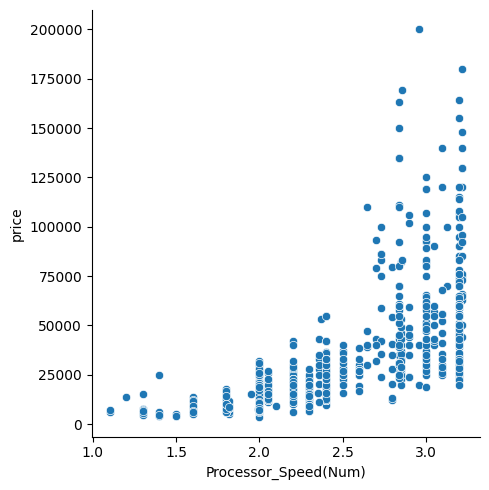

In [109]:
sns.relplot(data = df , y = 'price' , x = 'Processor_Speed(Num)')

Although the graph shows that there is a dependency of the price of the mobile phone on the processor speed but also it can be clearly seen that there are phones which are providing with the same processor speed from price range from as low as 25000 to 175000 .

In [110]:
pd.crosstab(df['Processor_Company'],df['Number_of_Cores'])

Number_of_Cores,Dual Core,Hexa Core,Octa Core,Quad Core
Processor_Company,,,,
A13,0,5,0,0
Bionic,0,34,1,0
Dimensity,0,0,176,0
Exynos,0,0,50,0
Fusion,0,0,0,1
Google,0,0,9,0
Helio,0,0,189,11
Kirin,0,0,6,0
Mediatek,0,0,0,1


As Bionic,A13 Processors are only used by the Apple hence it is quite clear that most of the Apple mobile phones work on Hexa Core Processors.

<Axes: xlabel='Number_of_Cores', ylabel='price'>

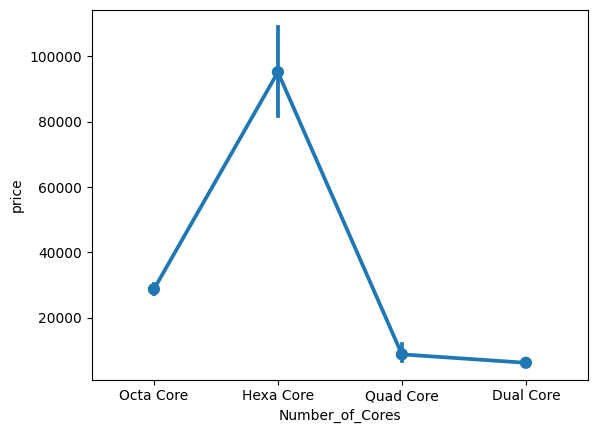

In [111]:
sns.pointplot(data =  df , x = 'Number_of_Cores' , y = 'price')

<Axes: xlabel='Number_of_Cores', ylabel='price'>

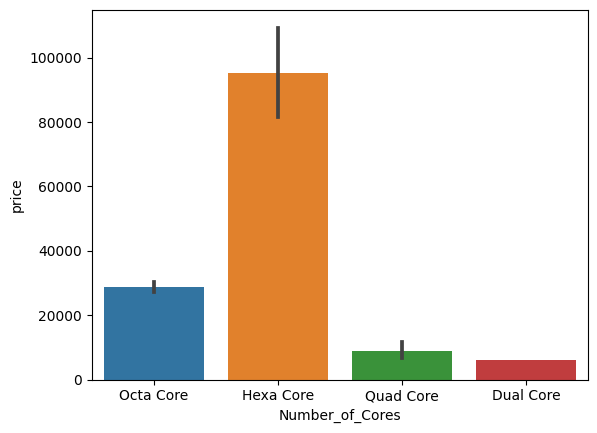

In [112]:
sns.barplot(data =  df , x = 'Number_of_Cores' , y = 'price')

As mostly the Apple Mobile Phones are using the Hexa Core Processor that might be the reason for such Trends in Prices.

In [113]:
temp_df = df.groupby(['RAM','ROM'])['index'].count().reset_index().sort_values(by = 'index',ascending = False)

In [114]:
temp_df = temp_df.sort_values(by = 'index',ascending = False).head(10)
temp_df

,RAM,ROM,index
29,8 GB,128 GB,267
24,6 GB,128 GB,190
21,4 GB,64 GB,143
4,12 GB,256 GB,69
30,8 GB,256 GB,68
17,4 GB,128 GB,62
15,3 GB,32 GB,37
27,6 GB,64 GB,29
11,2 GB,32 GB,24
16,3 GB,64 GB,15


1. The Above mentioned combination of the RAM and ROM are most widely found in the mobile phones available in the market.

In [115]:
temp_df['Ram-Rom'] = temp_df['RAM'] + '-' + temp_df['ROM']

In [116]:
temp_df = temp_df.iloc[:,2:]

In [117]:
temp_df =temp_df.iloc[:,[1,0]]

In [118]:
temp_df.columns = ['Ram-Rom','Count']

In [119]:
temp_df

,Ram-Rom,Count
29,8 GB-128 GB,267
24,6 GB-128 GB,190
21,4 GB-64 GB,143
4,12 GB-256 GB,69
30,8 GB-256 GB,68
17,4 GB-128 GB,62
15,3 GB-32 GB,37
27,6 GB-64 GB,29
11,2 GB-32 GB,24
16,3 GB-64 GB,15


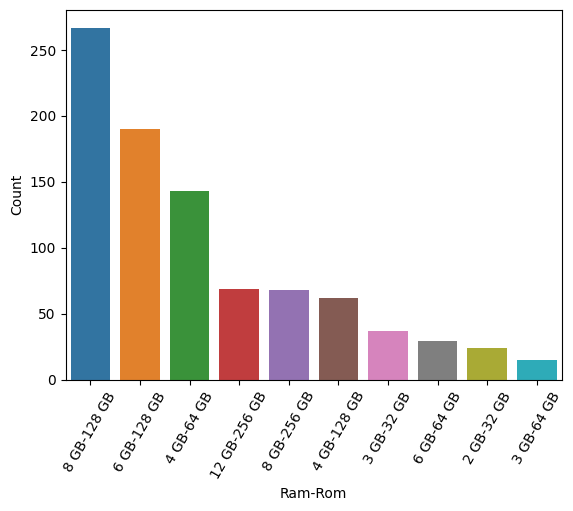

In [120]:
sns.barplot(data = temp_df , x = 'Ram-Rom' , y = 'Count')
plt.xticks(rotation=60)
plt.show()

## Effect of RAM, ROM on Price 

In [121]:
df3 = df.copy()

In [122]:
df3['RAM'] = df3['RAM'].str.split(' ').str.get(0)
df3['ROM'] = df3['ROM'].str.split(' ').str.get(0)

In [123]:
df3.head()

,index,model,brand_names,price,rating,SIM_Type,Contains_5G,Has_NFC,Has_IR_Blaster,Processor_name,Processor_Company,Number_of_Cores,Processor_Speed(Num),Processor_speed,RAM,ROM,Battery_Capacity,Fast_Charging_There?,Fast_Charging_in_(Watts),Screen_Size(inches),Resolution,Screen_Rate,Punch_Hole/Drop_Notch,Num_of_rear_cam,Rear Cam (primary_lens),Num_of_front_cam,Front Cam(primary_lens),Memory_Card_Supported_Or_Not,Capacity,OS_Type,OS_Version
0,2,OnePlus 11 5G,oneplus,54999,89.0,Dual Sim,True,True,False,Snapdragon 8 Gen2,Snapdragon,Octa Core,3.2,3.2 GHz Processor,12,256,5000.0,Contains Fast Charging,100.0,6.70,1440 x 3216 px,120,Punch Hole,3,50,1,16,Memory Card Not Supported,NaN,Android,v13
1,3,OnePlus Nord CE 2 Lite 5G,oneplus,19989,81.0,Dual Sim,True,False,False,Snapdragon 695,Snapdragon,Octa Core,2.2,2.2 GHz Processor,6,128,5000.0,Contains Fast Charging,33.0,6.59,1080 x 2412 px,120,Punch Hole,3,64,1,16,Memory Card (Hybrid),1TB,Android,v12
2,4,Samsung Galaxy A14 5G,samsung,16499,75.0,Dual Sim,True,False,False,Exynos 1330,Exynos,Octa Core,2.4,2.4 GHz Processor,4,64,5000.0,Contains Fast Charging,15.0,6.60,1080 x 2408 px,90,Water Drop Notch,3,50,1,13,Memory Card Supported,1TB,Android,v13
3,5,Motorola Moto G62 5G,motorola,14999,81.0,Dual Sim,True,False,False,Snapdragon 695,Snapdragon,Octa Core,2.2,2.2 GHz Processor,6,128,5000.0,Contains Fast Charging,NaN,6.55,1080 x 2400 px,120,Punch Hole,3,50,1,16,Memory Card (Hybrid),1TB,Android,v12
4,6,Realme 10 Pro Plus,realme,24999,82.0,Dual Sim,True,False,False,Dimensity 1080,Dimensity,Octa Core,2.6,2.6 GHz Processor,6,128,5000.0,Contains Fast Charging,67.0,6.70,1080 x 2412 px,120,Punch Hole,3,108,1,16,Memory Card Not Supported,NaN,Android,v13


In [124]:
df3['RAM'] = df3['RAM'].astype(float)
df3['ROM'] = df3['ROM'].astype(float)

In [125]:
df3.corr()['price']

C:\Users\91700\AppData\Local\Temp\ipykernel_29644\2879067064.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()['price']


index                      -0.001620
price                       1.000000
rating                      0.439928
Contains_5G                 0.451913
Has_NFC                     0.567767
Has_IR_Blaster             -0.033536
Processor_Speed(Num)        0.676673
RAM                         0.011653
ROM                         0.575273
Battery_Capacity           -0.216435
Fast_Charging_in_(Watts)    0.315776
Screen_Size(inches)         0.245002
Screen_Rate                 0.368265
Num_of_rear_cam             0.213585
Num_of_front_cam            0.122332
Name: price, dtype: float64

According to this the price is more affected by the ROM than that of the RAM.

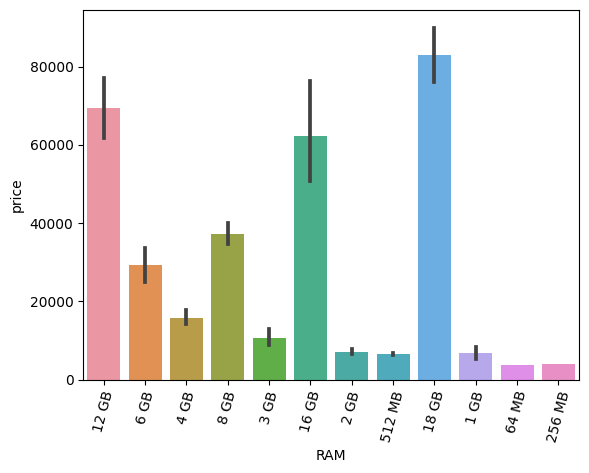

In [126]:
sns.barplot(data = df ,  x = 'RAM', y = 'price')
plt.xticks(rotation = 75)
plt.show()

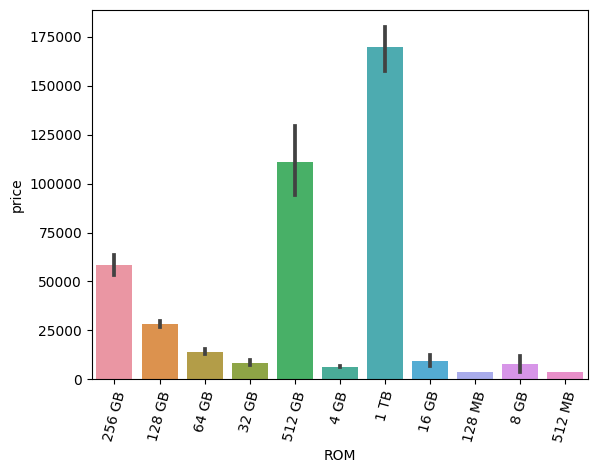

In [127]:
sns.barplot(data = df ,  x = 'ROM', y = 'price')
plt.xticks(rotation = 75)
plt.show()

In [128]:
t1_df=  df.groupby('RAM').agg({
    'price':'mean',
    'index':'count'
})
t1_df

,price,index
RAM,,
1 GB,6683.125000,8
12 GB,69510.204819,83
16 GB,62330.333333,9
18 GB,82994.500000,2
2 GB,7102.193548,31
256 MB,3999.000000,1
3 GB,10723.277778,54
4 GB,15837.009302,215
512 MB,6549.000000,2


In [129]:
t1_df.columns = ['Average','Count']

In [130]:
t1_df = t1_df.reset_index()

In [131]:
t1_df

,RAM,Average,Count
0,1 GB,6683.125000,8
1,12 GB,69510.204819,83
2,16 GB,62330.333333,9
3,18 GB,82994.500000,2
4,2 GB,7102.193548,31
5,256 MB,3999.000000,1
6,3 GB,10723.277778,54
7,4 GB,15837.009302,215
8,512 MB,6549.000000,2
9,6 GB,29306.649573,234


In [132]:
t_df =  df.groupby('ROM').agg({
    'price':'mean',
    'index':'count'
})
t_df

,price,index
ROM,,
1 TB,169555.600000,5
128 GB,28288.061185,523
128 MB,3589.000000,1
16 GB,9350.250000,12
256 GB,58247.025974,154
32 GB,8362.014925,67
4 GB,6549.000000,2
512 GB,111085.050000,20
512 MB,3999.000000,1


In [133]:
t_df.columns = ['Average','Count']

In [134]:
t_df.reset_index(inplace = True)

In [135]:
t1_df

,RAM,Average,Count
0,1 GB,6683.125000,8
1,12 GB,69510.204819,83
2,16 GB,62330.333333,9
3,18 GB,82994.500000,2
4,2 GB,7102.193548,31
5,256 MB,3999.000000,1
6,3 GB,10723.277778,54
7,4 GB,15837.009302,215
8,512 MB,6549.000000,2
9,6 GB,29306.649573,234


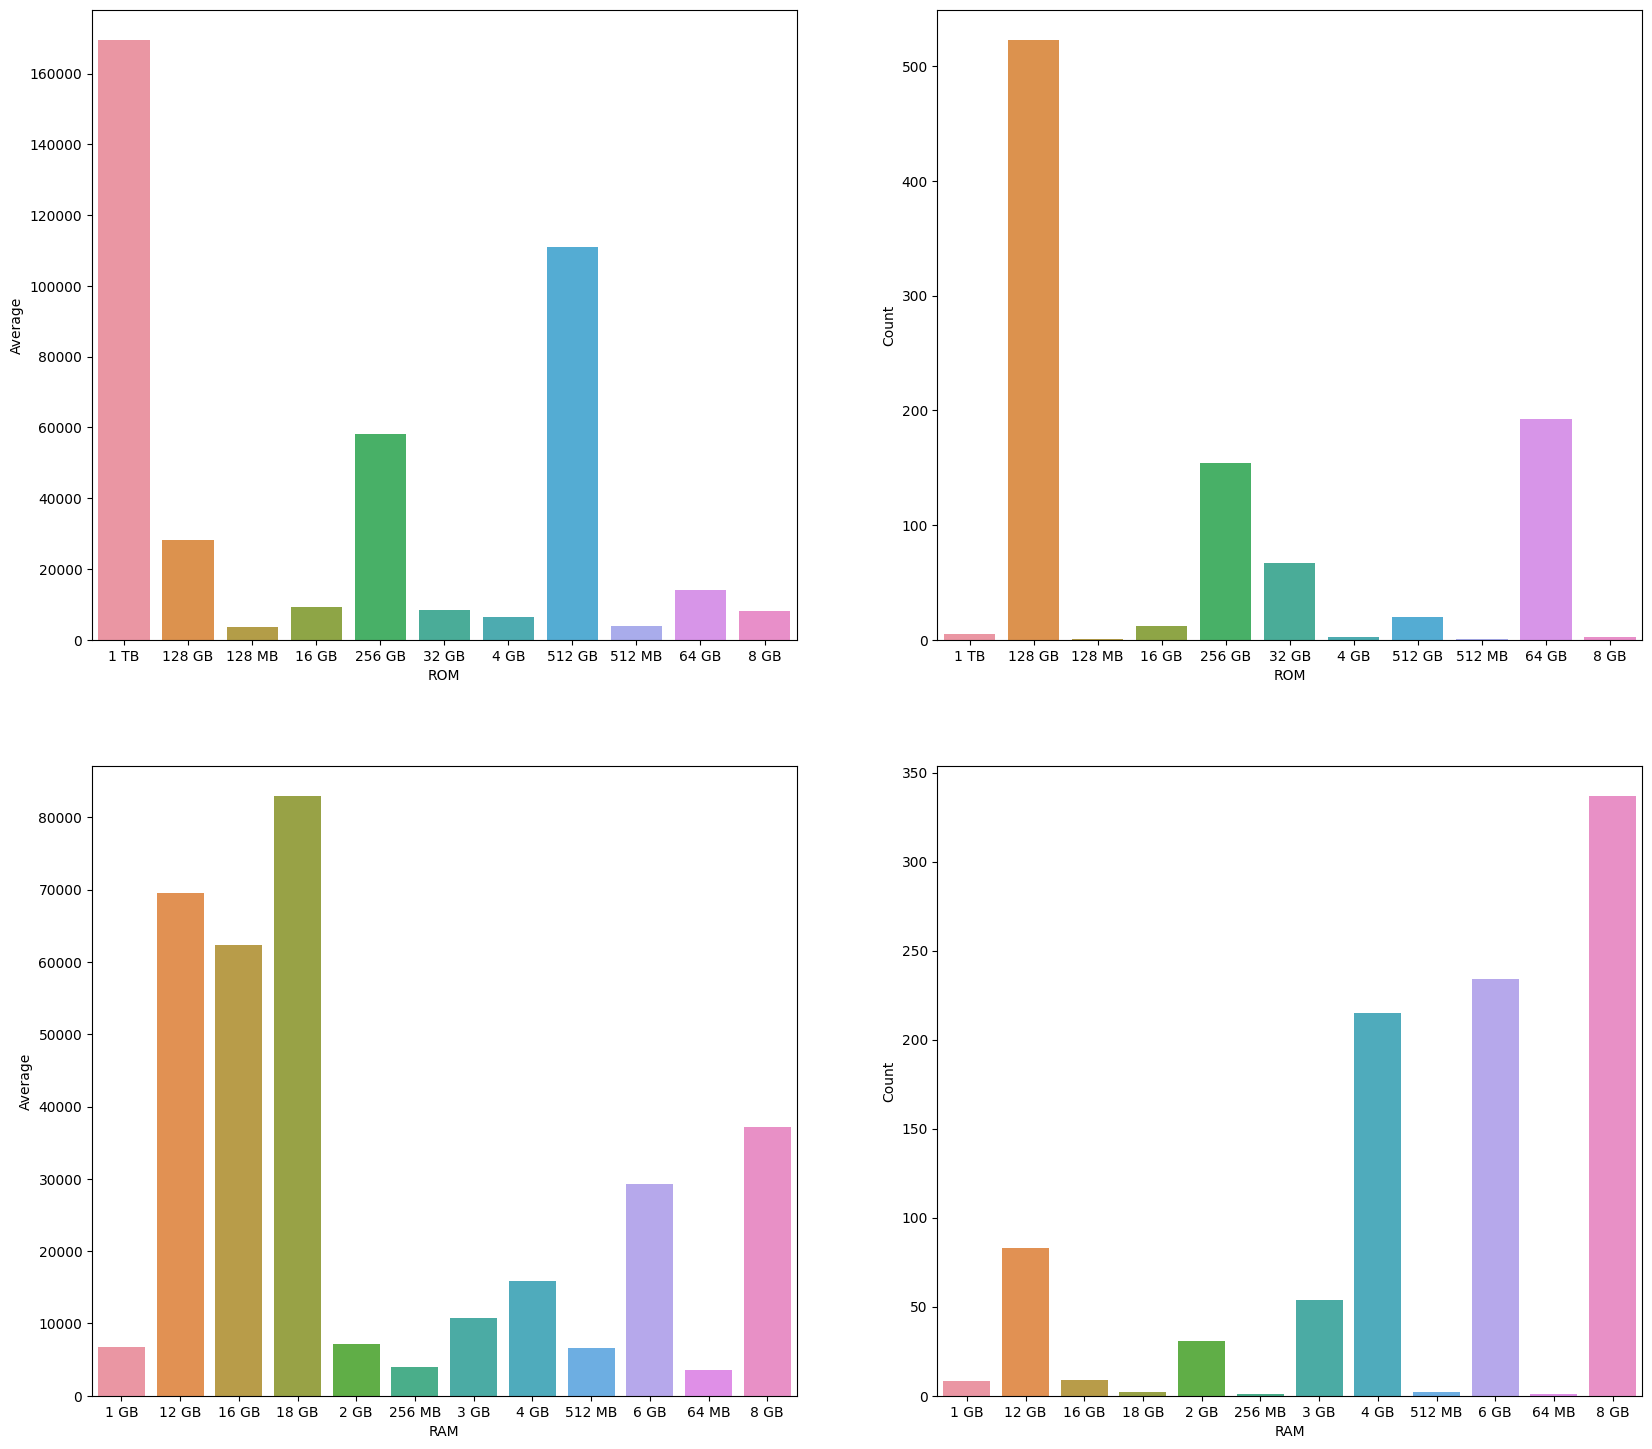

In [136]:
fig,ax = plt.subplots(ncols = 2 , nrows = 2,figsize = (20,18))
sns.barplot(data = t_df ,  x = 'ROM', y = 'Average',ax = ax[0,0])
sns.barplot(data=t_df , x = 'ROM' ,y = 'Count' , ax = ax[0,1])
sns.barplot(data = t1_df , x = 'RAM' , y = 'Average' , ax = ax[1,0])
sns.barplot(data = t1_df , x = 'RAM' , y = 'Count' , ax = ax[1,1])
plt.show()

In [137]:
t_df

,ROM,Average,Count
0,1 TB,169555.600000,5
1,128 GB,28288.061185,523
2,128 MB,3589.000000,1
3,16 GB,9350.250000,12
4,256 GB,58247.025974,154
5,32 GB,8362.014925,67
6,4 GB,6549.000000,2
7,512 GB,111085.050000,20
8,512 MB,3999.000000,1
9,64 GB,14054.593750,192


1. Here we can see that the Average of the 1 TB , 512 GB are among the highest , but their count is among the lowest .which shows that their per unit price is very high. and for ROM such as that of 128GB , 256 GB 64 GB  , their usag is more and thus their average price decreases.
2. But as we go from 128 MB( the lowest ) to 1 TB (the highest) the average price actuallt increases.

1. Here also as we go from 64 MB( the lowest) to 18 GB (the highest) the average Price Increases.

## Battery Capacity

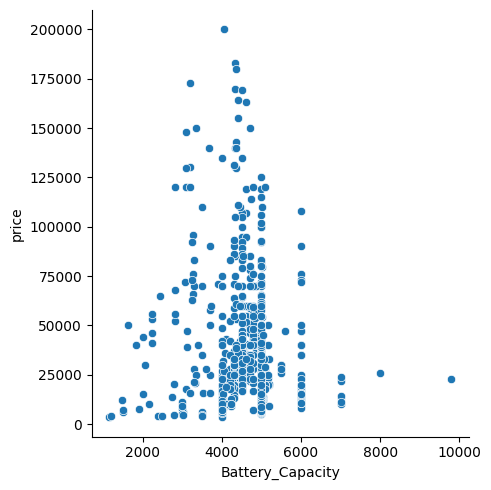

In [138]:
sns.relplot( x = df['Battery_Capacity'] , y= df['price'])

with increase in the Battery capacity there is no such increase in the price of the mobile phones., Also there are many such mobile phones in the range of 4000 to roughly 5600 where for the same battery capacity we can make a purchase at a very affordable price.

In [139]:
df.corr()['Screen_Size(inches)']

C:\Users\91700\AppData\Local\Temp\ipykernel_29644\3080087227.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Screen_Size(inches)']


index                      -0.056683
price                       0.245002
rating                      0.290275
Contains_5G                 0.228559
Has_NFC                     0.122493
Has_IR_Blaster              0.128611
Processor_Speed(Num)        0.311459
Battery_Capacity            0.599602
Fast_Charging_in_(Watts)    0.266355
Screen_Size(inches)         1.000000
Screen_Rate                 0.308107
Num_of_rear_cam             0.390067
Num_of_front_cam            0.066414
Name: Screen_Size(inches), dtype: float64

## Availability Of Fast Charging

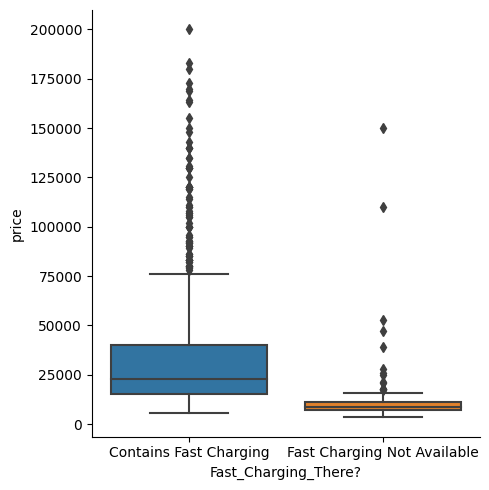

In [140]:
sns.catplot(kind = 'box' , x = 'Fast_Charging_There?' , y  ='price', data = df)

In [141]:
df.drop(index = 787 , inplace = True)

In [142]:
df['price'].describe()

count       978.000000
mean      30794.285276
std       29735.319289
min        3499.000000
25%       12999.000000
50%       19990.000000
75%       34999.000000
max      199990.000000
Name: price, dtype: float64

In [143]:
df

,index,model,brand_names,price,rating,SIM_Type,Contains_5G,Has_NFC,Has_IR_Blaster,Processor_name,Processor_Company,Number_of_Cores,Processor_Speed(Num),Processor_speed,RAM,ROM,Battery_Capacity,Fast_Charging_There?,Fast_Charging_in_(Watts),Screen_Size(inches),Resolution,Screen_Rate,Punch_Hole/Drop_Notch,Num_of_rear_cam,Rear Cam (primary_lens),Num_of_front_cam,Front Cam(primary_lens),Memory_Card_Supported_Or_Not,Capacity,OS_Type,OS_Version
0,2,OnePlus 11 5G,oneplus,54999,89.0,Dual Sim,True,True,False,Snapdragon 8 Gen2,Snapdragon,Octa Core,3.20,3.2 GHz Processor,12 GB,256 GB,5000.0,Contains Fast Charging,100.0,6.70,1440 x 3216 px,120,Punch Hole,3,50,1,16,Memory Card Not Supported,NaN,Android,v13
1,3,OnePlus Nord CE 2 Lite 5G,oneplus,19989,81.0,Dual Sim,True,False,False,Snapdragon 695,Snapdragon,Octa Core,2.20,2.2 GHz Processor,6 GB,128 GB,5000.0,Contains Fast Charging,33.0,6.59,1080 x 2412 px,120,Punch Hole,3,64,1,16,Memory Card (Hybrid),1TB,Android,v12
2,4,Samsung Galaxy A14 5G,samsung,16499,75.0,Dual Sim,True,False,False,Exynos 1330,Exynos,Octa Core,2.40,2.4 GHz Processor,4 GB,64 GB,5000.0,Contains Fast Charging,15.0,6.60,1080 x 2408 px,90,Water Drop Notch,3,50,1,13,Memory Card Supported,1TB,Android,v13
3,5,Motorola Moto G62 5G,motorola,14999,81.0,Dual Sim,True,False,False,Snapdragon 695,Snapdragon,Octa Core,2.20,2.2 GHz Processor,6 GB,128 GB,5000.0,Contains Fast Charging,NaN,6.55,1080 x 2400 px,120,Punch Hole,3,50,1,16,Memory Card (Hybrid),1TB,Android,v12
4,6,Realme 10 Pro Plus,realme,24999,82.0,Dual Sim,True,False,False,Dimensity 1080,Dimensity,Octa Core,2.60,2.6 GHz Processor,6 GB,128 GB,5000.0,Contains Fast Charging,67.0,6.70,1080 x 2412 px,120,Punch Hole,3,108,1,16,Memory Card Not Supported,NaN,Android,v13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,1017,Motorola Moto Edge S30 Pro,motorola,34990,83.0,Dual Sim,True,False,False,Snapdragon 8 Gen1,Snapdragon,Octa Core,3.00,3 GHz Processor,8 GB,128 GB,5000.0,Contains Fast Charging,68.2,6.67,1080 x 2460 px,120,Punch Hole,3,64,1,16,Memory Card Not Supported,NaN,Android,v12
981,1018,Honor X8 5G,honor,14990,75.0,Dual Sim,True,False,False,Snapdragon 480+,Snapdragon,Octa Core,2.20,2.2 GHz Processor,6 GB,128 GB,5000.0,Contains Fast Charging,22.5,6.50,720 x 1600 px,60,NaN,3,48,1,8,Memory Card Supported,1TB,Android,v11
982,1019,POCO X4 GT 5G (8GB RAM + 256GB),poco,28990,85.0,Dual Sim,True,True,True,Dimensity 8100,Dimensity,Octa Core,2.85,2.85 GHz Processor,8 GB,256 GB,5080.0,Contains Fast Charging,67.0,6.60,1080 x 2460 px,144,Punch Hole,3,64,1,16,Memory Card Not Supported,NaN,Android,v12
983,1020,Motorola Moto G91 5G,motorola,19990,80.0,Dual Sim,True,True,False,Snapdragon 695,Snapdragon,Octa Core,2.20,2.2 GHz Processor,6 GB,128 GB,5000.0,Contains Fast Charging,NaN,6.80,1080 x 2400 px,60,NaN,3,108,1,32,Memory Card Supported,1TB,Android,v12
